In [6]:
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'

In [11]:
df = pd.read_csv(f"/Users/takuto/iriki/GJ1214/A_data/sa.txt", delimiter=' ', parse_dates=True)
df.head(3)

,TIME,FLUX,O_FLUX,C_FLUX,AIRMASS,RELATIVE
0,2.455788e+06,0.987535,1497927.0,1516834.0,1.262582,0.999769
1,2.455788e+06,0.987399,1497730.0,1516843.0,1.263120,0.999627
2,2.455788e+06,0.992114,1502231.0,1514171.0,1.263678,1.004396


In [12]:
len(df)

174

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


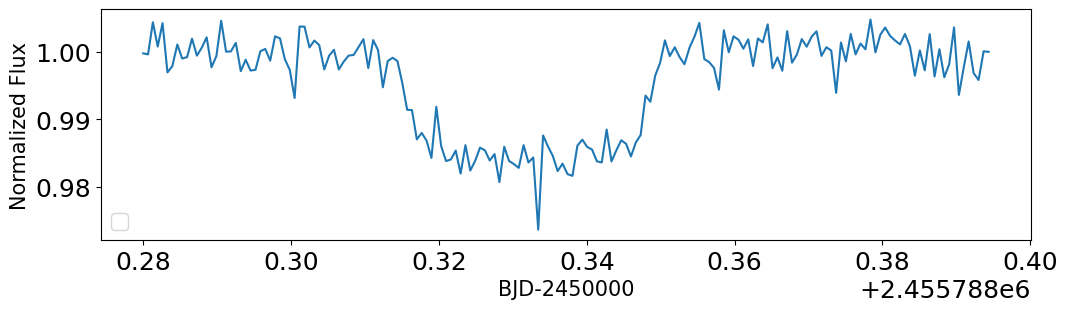

In [13]:
fig,ax = pl.subplots(1,1,figsize=(12,3),sharex=True)

time = df['TIME']
flux = df['RELATIVE']

ax.plot(time, flux)

#add plot labels
ax.set_xlabel('BJD-2450000')
ax.set_ylabel('Normalized Flux')
ax.legend(loc='lower left')

In [ ]:
import batman

params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 1.                       #orbital period
params.rp = 0.1                       #planet radius (in units of stellar radii)
params.a = 15.                        #semi-major axis (in units of stellar radii)
params.inc = 87.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.025, 0.025, 1000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model